##Note: do not expect photos here to appear "nice"... they are indeed very "raw"


* Because you need to have many Convo layers.... Pooling layers... in order to extract Full Features
* Else, the final image shown has very few features extracted, and looks "raw" 



##This is what we are trying to do here:

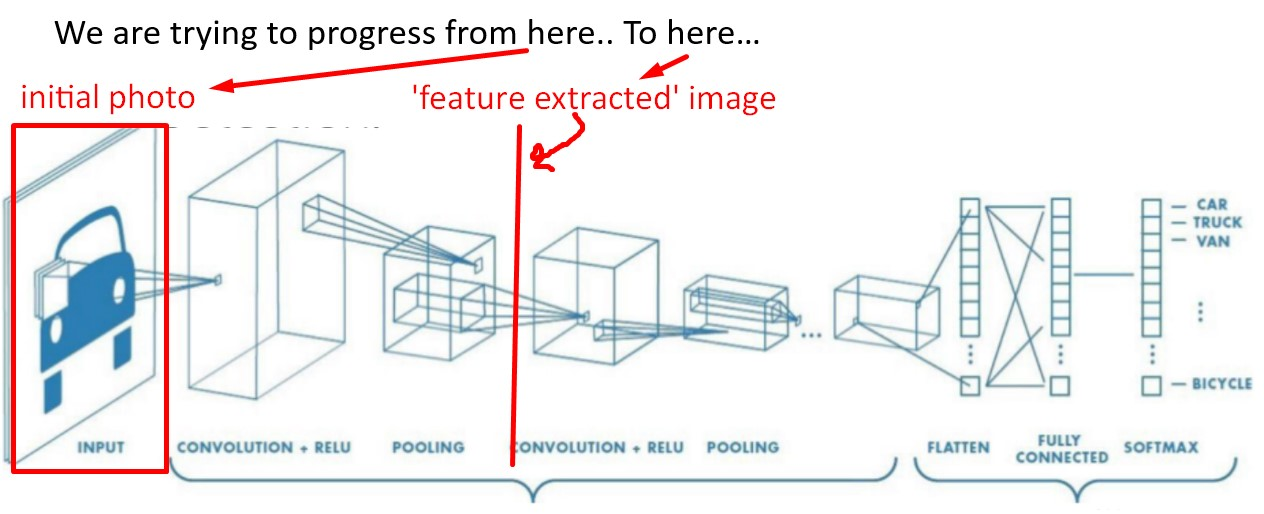

#Step 1: Import All Libraries

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image

%matplotlib inline

#Step 2: Show the Photo

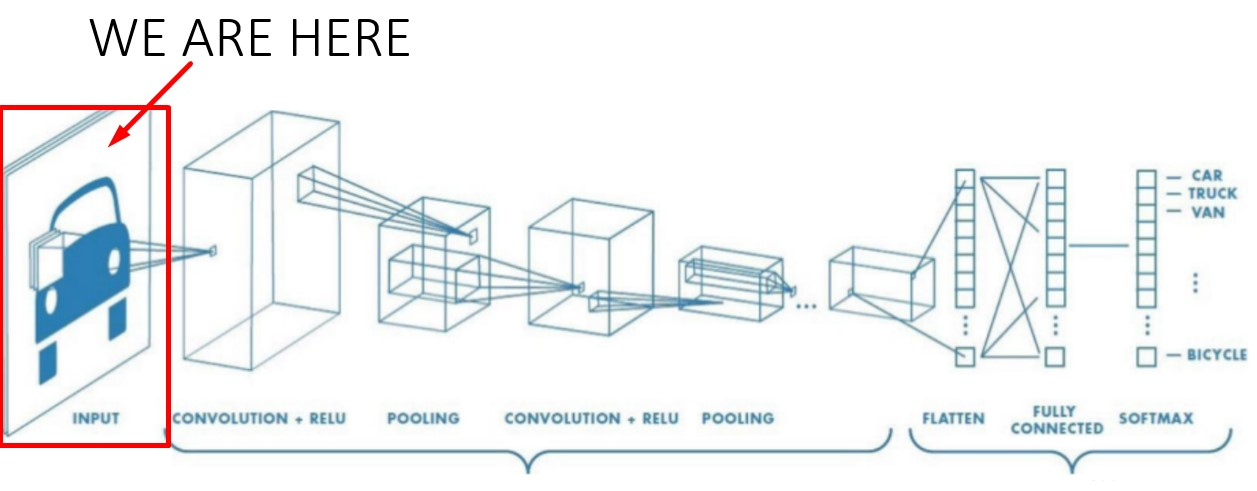

In [29]:
alvin = cv2.imread('/content/ALVIN.jpg')

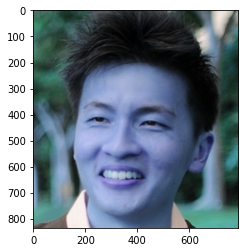

In [30]:
plt.imshow(alvin)

In [31]:
# what does the image look like?
alvin.shape

#1408 pixels by 793 pixels with 3 channels RGB

(836, 789, 3)

#Step 3: Demonstrating effect of 1 Convo Layer
##What Does a Convolution Layer Do? aka Filtering

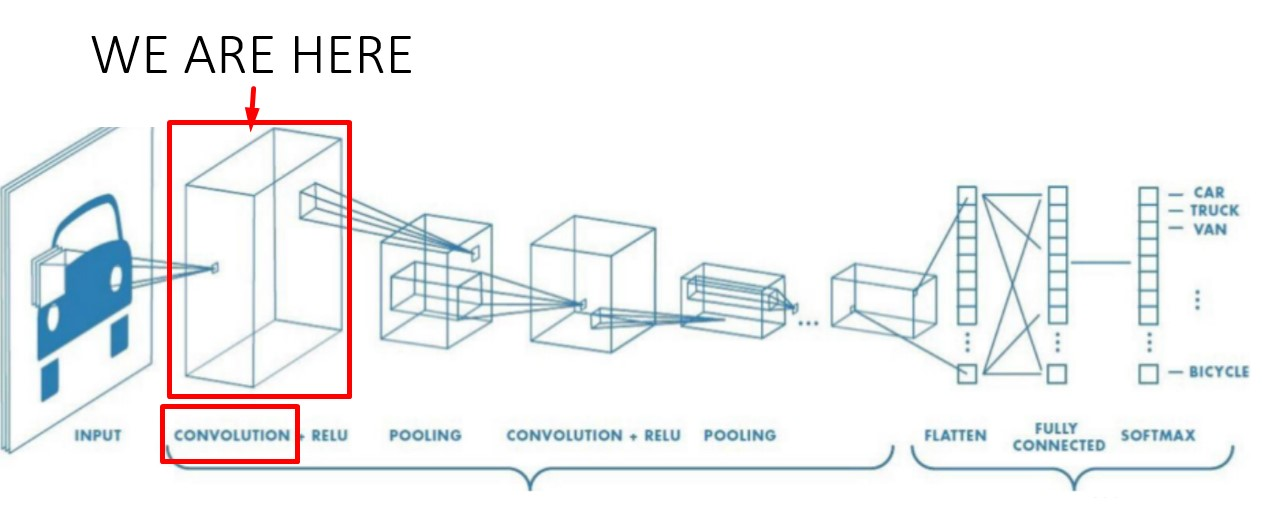

##3a) Sequential Modeling

In [32]:
model = Sequential()

model.add(Conv2D(filters = 3, 
                 #we need to use 3 filters because its RGB

                 kernel_size = (3, 3),
                 #we use a commonly used kernel_size of 3x3

                 #strides = 1,
                 #default stride = 1, even if you don't declare

                 #padding = 'same',
                 #default padding = 'valid', even if you don't declare
                 #we use 'same' to prevent loss of information
                 
                 #activation = None,
                 #default activation = 'none', even if you don't declare
                 #but for now, we purposely force our activation to 'none'
                 #for purpose of demonstrating the effect of 1 Conv layer
                 #without activation

                 input_shape = alvin.shape))

##3b) Squeezing (ignore!)

In [33]:
#ignore the steps below.... they are just to resize and reshape
#so that it fits the model....
# Keras expects batches of images, so we have to add a dimension to trick it

alvin_batch = np.expand_dims(alvin, axis = 0)
conv_alvin = model.predict(alvin_batch)
conv_alvin = np.squeeze(conv_alvin, axis = 0)

##3c) Convo Output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


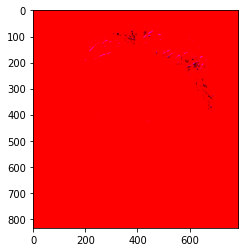

In [35]:
plt.imshow(conv_alvin)

#sometimes the photo is yellow, sometimes red, sometimes blue
#it will change upon different runs

#Step 4: Demonstrating effect of adding Relu activation
##What happens when you Add a Relu Activation?

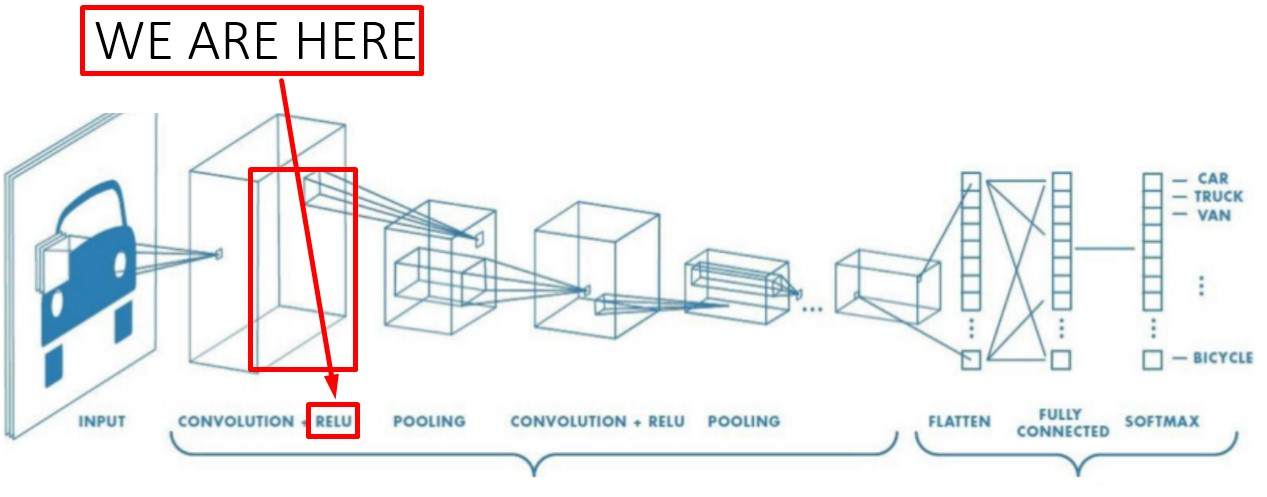

##4a) Sequential Modeling

In [36]:
model2 = Sequential()

model2.add(Conv2D(filters = 3, 
                  kernel_size = (3, 3),
                  #strides = 1,
                  #padding = 'same',
                    
                  activation = 'relu',
                  #now we purposely change to Relu Activation
                  #to observe its effect
                 
                  input_shape = alvin.shape))

##4b) Squeezing (ignore!)

In [37]:
#ignore the steps below.... they are just to resize and reshape
#so that it fits the model....
# Keras expects batches of images, so we have to add a dimension to trick it

alvin_batch_2 = np.expand_dims(alvin, axis = 0)
conv_alvin_2 = model2.predict(alvin_batch_2)
conv_alvin_2 = np.squeeze(conv_alvin_2, axis = 0)

##4c) Relu Output

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


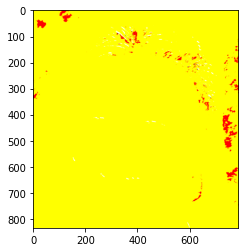

In [38]:
plt.imshow(conv_alvin_2)

#Step 5: Demonstrating effect of Pooling
#What does Pooling do? 

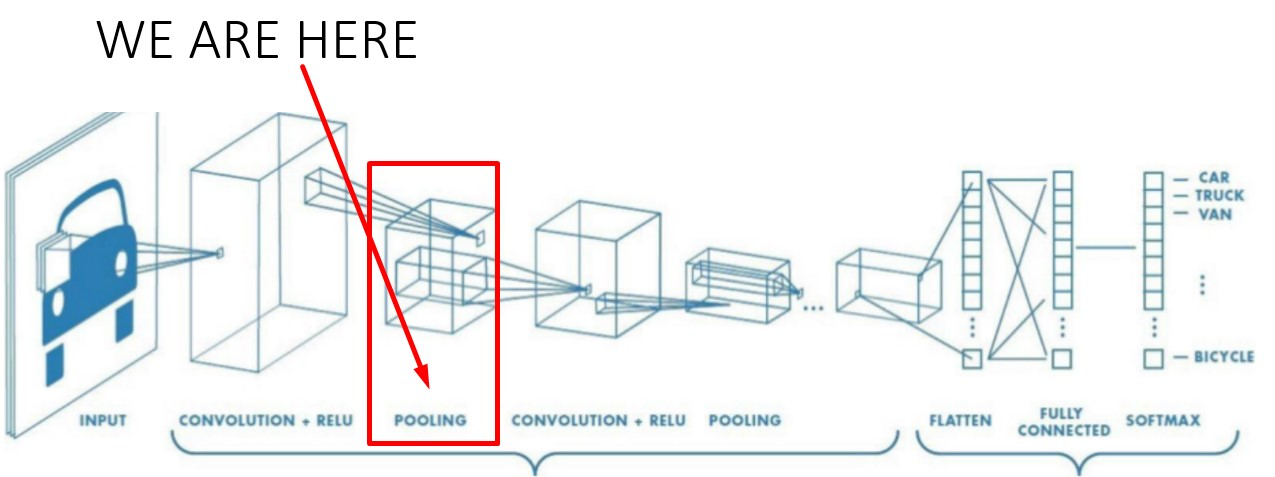

##5a) Sequential Modeling

In [39]:
model3 = Sequential()

model3.add(Conv2D(filters = 3, 
                  kernel_size = (3, 3),
                  #strides = 1,
                  #padding = 'same',
                    
                  activation = 'relu',
                  #activation is set to None by default
                  #but over here, we want to progressively see the effects
                  #of Convolution--> Relu --> Pooling
                  #so we use Relu

                  input_shape = alvin.shape))

model3.add(MaxPooling2D((2, 2)))
#2x2 receptive field is default and commonly used 


##5b) Squeezing (ignore!)

In [40]:
#ignore the steps below.... they are just to resize and reshape
#so that it fits the model....
# Keras expects batches of images, so we have to add a dimension to trick it

alvin_batch_3 = np.expand_dims(alvin, axis = 0)
conv_alvin_3 = model3.predict(alvin_batch_3)
conv_alvin_3 = np.squeeze(conv_alvin_3, axis = 0)

##5c) Pooling Output

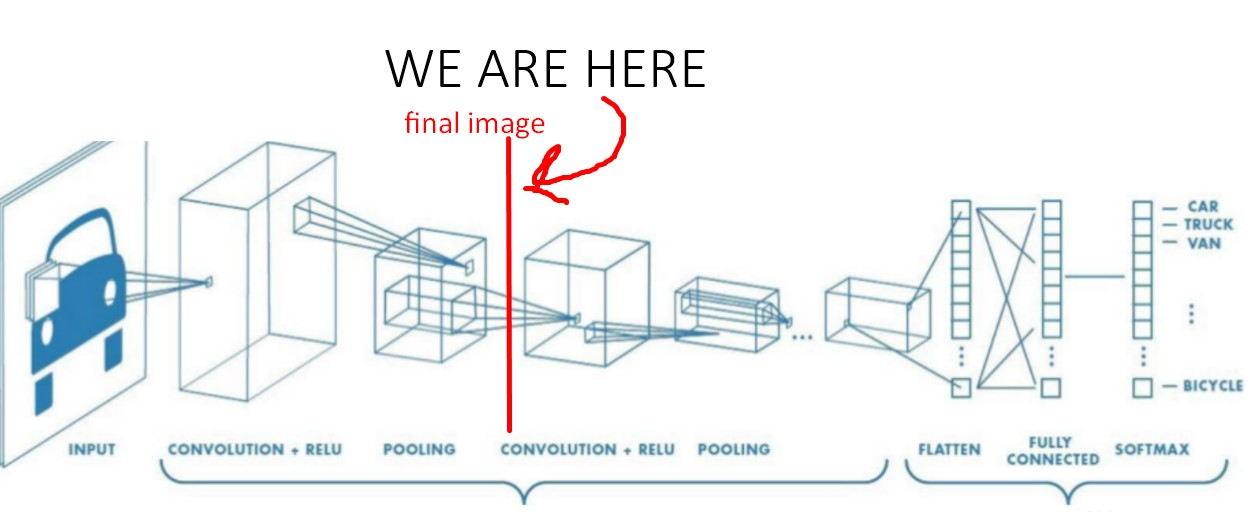

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


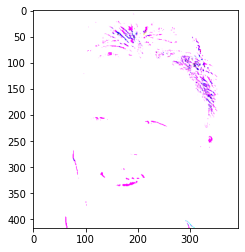

In [41]:
plt.imshow(conv_alvin_3)

#you can see that the Convo + Relu + Pooling extracted 
#my hair + eyes + teeth



---



#THE END



---

